In [2]:
%matplotlib inline

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as plt
import pylab

# pylab.rcParams['figure.figsize'] = (8, 10.)
sns.set(font='sans-serif')

In [47]:
df = pd.read_csv("/Users/brow015/devel/cbbmiseq/tests/test_run_id/tables/test_run_id_crossover_stats.csv", header=0, index_col=0)
df.head(1)
len(df)

177

In [48]:
# remove the samples that have no contamination
df = df[df.sum(axis=1) > 0]
# tdf.head(2)
len(df)

126

In [59]:
# select the references as them mapping to themselves isn't of interest here
# remove them from the subset
d = {'unmatched'}
for f in df.index:
    for c in df.columns:
        if f in c:
            d.add(f)
df_no = df[~df.index.isin(d)].sort()
df_no.head(15)

{'bsubtilis',
 'cytophaga',
 'flavobacterium',
 'shewanella',
 'unmatched',
 'xylanomonas'}

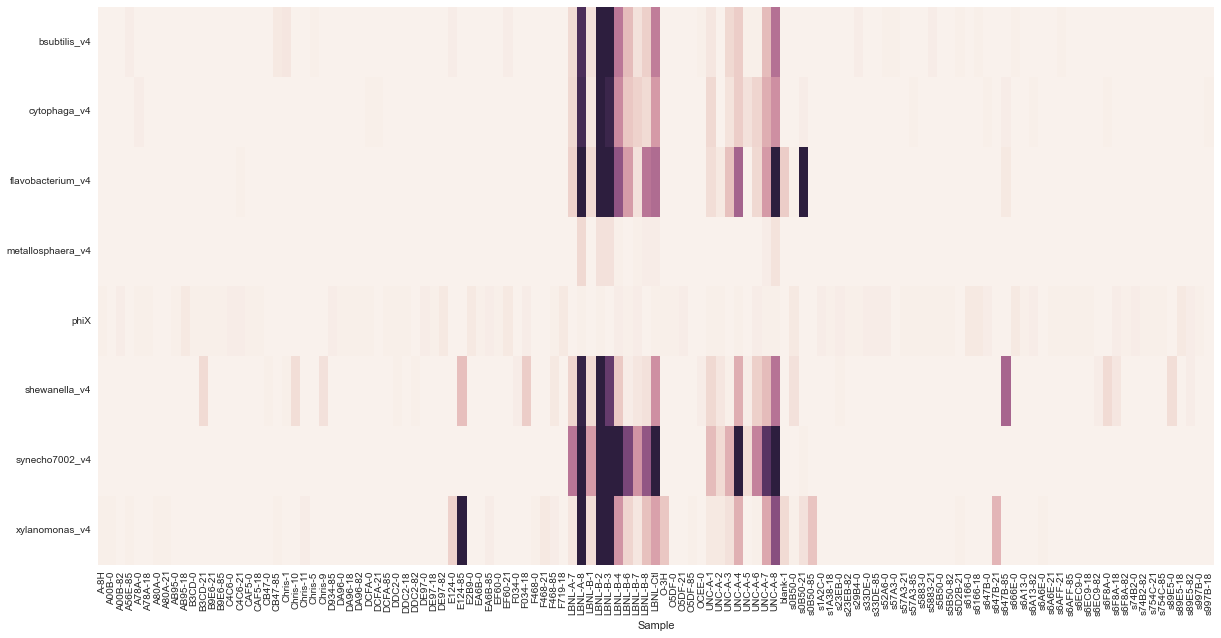

In [111]:
# pylab.rcParams['figure.figsize'] = (len(df_no.columns) / 2.5, len(df_no) / 5.)
# # sns.heatmap(df_no, robust=True, annot=False)#, cmap="YlGnBu")
# sns.heatmap(df_no, robust=True, annot=False, cbar=False)#, cmap="YlGnBu")

# pylab.rcParams['figure.figsize'] = (len(df_no) / 5., len(df_no.columns) / 2.5)
# sns.heatmap(df_no, robust=True, annot=False)#, cmap="YlGnBu")
# sns.clustermap(df_no.T, figsize=(15, 5))
sns.heatmap(df_no.T, robust=True, annot=False, cbar=False)#, cmap="YlGnBu")


In [89]:
tsv = "/Users/brow015/devel/cbbmiseq/tests/test_run_id/tables/test_run_id_demultiplexing_stats.csv"
cdf = pd.read_table(tsv, index_col=False, usecols=[0,1], header=0)
# cdf = cdf.set_index(['Id'])
cdf = cdf[cdf['Id'] != "total"]
cdf = cdf[cdf['Id'] != "unmatched"]

# select the references as them mapping to themselves isn't of interest here
# remove them from the subset
# cdf_no = cdf[~cdf.index.isin(d)].sort()


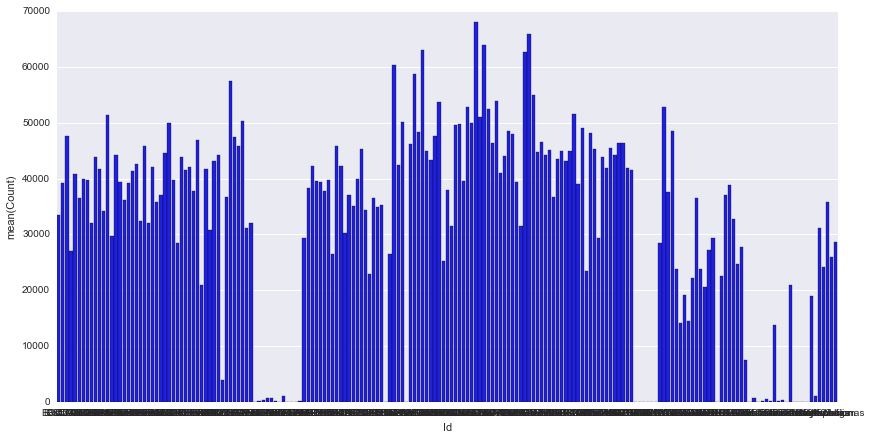

In [98]:
# sns.heatmap(cdf_no.T, robust=False, annot=False)
pylab.rcParams['figure.figsize'] = (14, 7)
sns.barplot(x="Id", y="Count", data=cdf, color="blue")

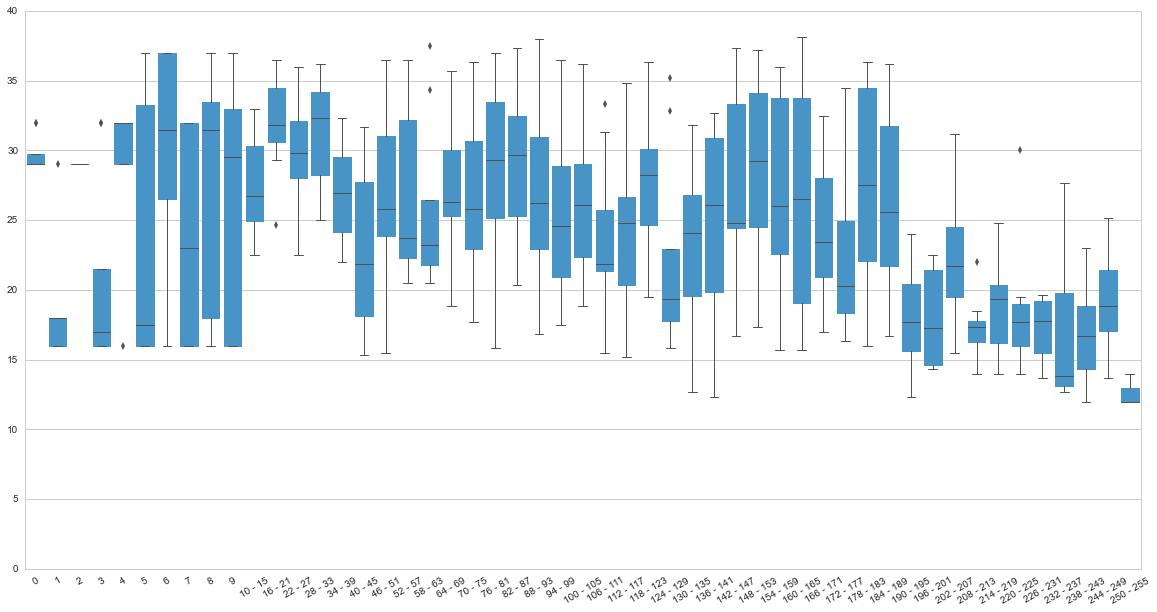

In [122]:
dd = pd.read_pickle("/Users/brow015/Downloads/t.pickle")
sns.set_style('whitegrid')
sns.set_context(rc={"lines.linewidth": 1})

pylab.rcParams['figure.figsize'] = (20, 10)

p = sns.boxplot(data=dd, color="#3498db")
axes = p.axes
axes.set_ylim(0,40)

for t in axes.get_xticklabels():
    t.set(rotation=30)

In [5]:
import scipy

In [14]:
from cbbmiseq import fastx_reader
# seqtk -s seed fastq n | awk 'NR % 4 == 0'
def qual_to_means(v, chunksize=5):
    l = []
    for i in range(0, 251, 5):
        l.append(v[i:i+4].mean())
    return l

def qual_to_values(qualstr, offset):
    return np.fromstring(qualstr, dtype=np.uint8) - offset

pylab.rcParams['figure.figsize'] = (20, 10)

offset = 33
fq = "/Users/brow015/Downloads/test_r1.fastq"
# fq = "/Users/brow015/devel/cbbmiseq/tests/test_run_id/Undetermined_S0_L001_R1_001.fastq.gz"
quals = []
for i, (name, seq, qual) in enumerate(fastx_reader(fq)):
    if i == 1000000:
        break
    qual_vals = qual_to_values(qual, offset)
    qq = qual_to_means(qual_vals, 5)
    quals.append(np.fromstring(qual, dtype=np.uint8) - offset)
    qq = scipy.sparse.lil_matrix(qq)
    print(qq)
quals = scipy.sparse.lil_matrix(quals)
# quals
# quals = pd.DataFrame(quals)
# longest_read = len(quals.columns)
# desired columns is ~50
# step = int(longest_read / 40.)
# step_idx = step - 1
# first 10 bases as individual
# grouped_quals = quals.ix[:,0:9]
# grouped_quals.head(1)
# print("calculating means")
# for i in range(10, longest_read, step):
#     grouped_quals['%d' % i] = df.ix[:, i:i + step_idx].mean(1)

# p = sns.boxplot(data=grouped_quals, color="#3498db", fliersize=0)
# sns.boxplot(quals, color="#3498db", fliersize=0)
# axes = p.axes
# axes.set_ylim(0,40)

# for t in axes.get_xticklabels():
#     t.set(rotation=45)


  (0, 0)	25.75
  (0, 1)	20.25
  (0, 2)	24.75
  (0, 3)	25.0
  (0, 4)	20.75
  (0, 5)	25.25
  (0, 6)	19.5
  (0, 7)	15.25
  (0, 8)	16.5
  (0, 9)	28.0
  (0, 10)	20.0
  (0, 11)	16.0
  (0, 12)	18.5
  (0, 13)	16.0
  (0, 14)	20.0
  (0, 15)	19.25
  (0, 16)	17.75
  (0, 17)	18.5
  (0, 18)	20.25
  (0, 19)	15.25
  (0, 20)	15.5
  (0, 21)	19.25
  (0, 22)	17.5
  (0, 23)	16.0
  (0, 24)	12.0
  (0, 25)	12.0
  (0, 26)	17.5
  (0, 27)	17.0
  (0, 28)	16.0
  (0, 29)	16.5
  (0, 30)	16.5
  (0, 31)	16.5
  (0, 32)	18.5
  (0, 33)	16.0
  (0, 34)	14.0
  (0, 35)	18.0
  (0, 36)	14.0
  (0, 37)	16.0
  (0, 38)	16.0
  (0, 39)	16.5
  (0, 40)	14.0
  (0, 41)	14.0
  (0, 42)	14.0
  (0, 43)	14.0
  (0, 44)	14.0
  (0, 45)	14.0
  (0, 46)	15.5
  (0, 47)	13.5
  (0, 48)	nan
  (0, 49)	nan
  (0, 50)	nan
  (0, 0)	22.5
  (0, 1)	23.75
  (0, 2)	24.75
  (0, 3)	31.0
  (0, 4)	36.0
  (0, 5)	34.25
  (0, 6)	30.0
  (0, 7)	25.75
  (0, 8)	16.0
  (0, 9)	23.0
  (0, 10)	33.25
  (0, 11)	14.0
  (0, 12)	27.5
  (0, 13)	21.5
  (0, 14)	26.5
  (0, 15)	36.75
 

/Users/brow015/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [226]:
tmp = pd.DataFrame()
step=7
for i in range(10):
    tmp[i] = df[i]
for i in range(10, 251, step):
    tmp['%d' % i] = df.ix[:,i:i + step - 1].mean(1)
tmp['read'] = "R2"
tmp.head(1)

# r1 = pd.DataFrame()
# step=7
# for i in range(10):
#     r1[i] = df[i]
# for i in range(10, 251, step):
#     r1['%d' % i] = df.ix[:,i:i + step - 1].mean(1)
# r1['read'] = "R1"

# r1.head(1)

# foo = pd.merge(tmp, r1)
# foo = r1.append(tmp, ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,...,192,199,206,213,220,227,234,241,248,read
0,29,29,29,16,29,16,31,16,18,16,...,15.428571,14.571429,15.428571,14,14,14,13.714286,14.857143,13.333333,R2


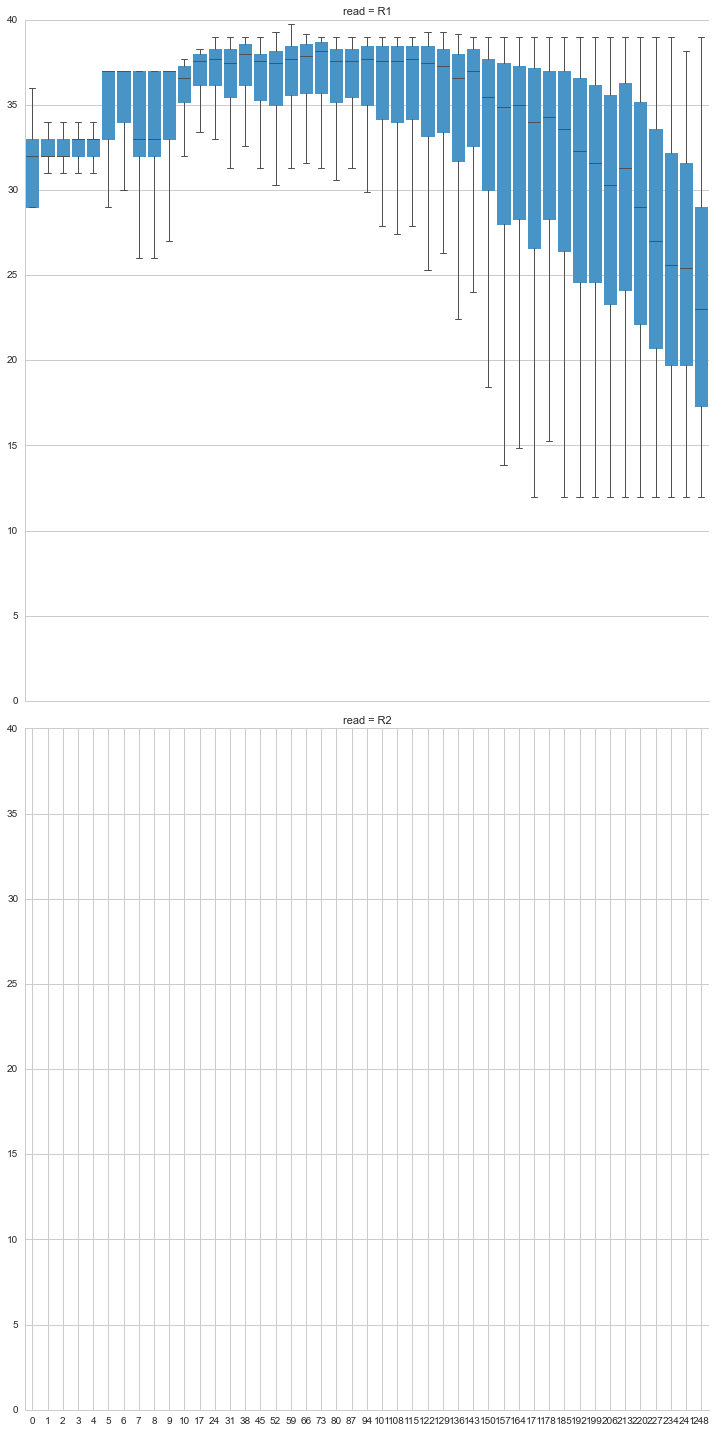

In [212]:
pylab.rcParams['figure.figsize'] = (20, 10)

g = sns.FacetGrid(foo, col="read", col_wrap=1, size=10, ylim=(0, 40))
g.map(sns.boxplot, data=foo, color="#3498db", fliersize=0)
g.add_legend()

# p = sns.boxplot(data=foo, color="#3498db")
# axes = p.axes
# axes.set_ylim(0,40)

# for t in axes.get_xticklabels():
#     t.set(rotation=45)

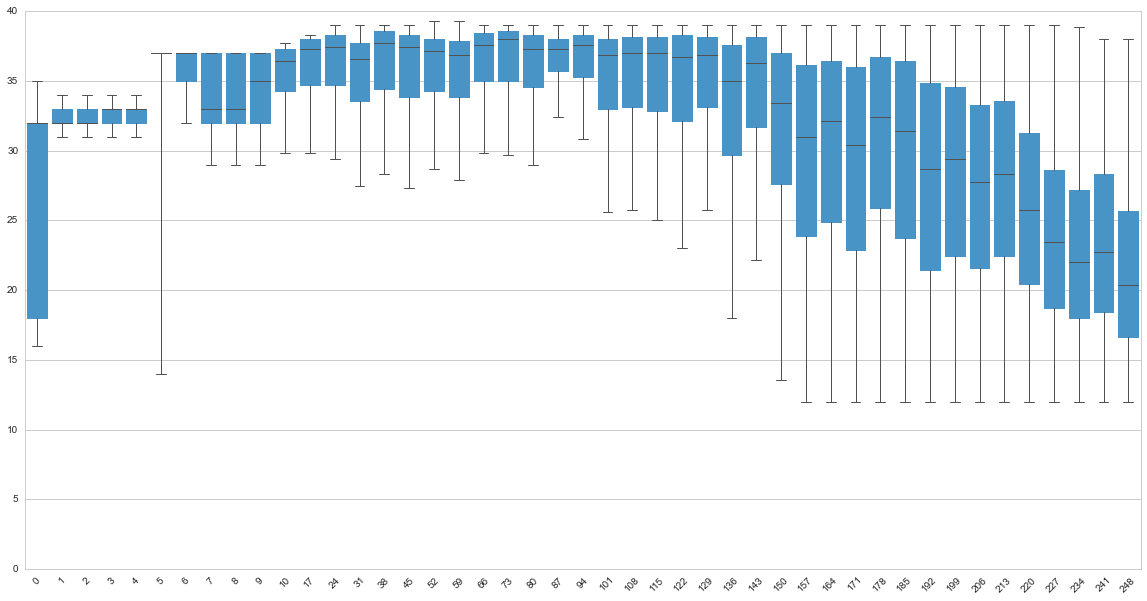

In [180]:
pylab.rcParams['figure.figsize'] = (20, 10)

p = sns.boxplot(data=tmp, color="#3498db", fliersize=0)
axes = p.axes
axes.set_ylim(0,40)

for t in axes.get_xticklabels():
    t.set(rotation=45)

In [178]:
tmp.head(1)

,0,1,2,3,4,5,6,7,8,9,...,196,202,208,214,220,226,232,238,244,250
0,32,33,33,33,33,37,37,37,37,37,...,21.833333,22.5,33,22.666667,24.5,23.5,20.833333,19,26,13
